# Load Data

Upload kaggle token API

In [1]:
# file ini bisa didapatkan di setiap akun kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"andharsm","key":"aa01adb9e93691614d246ac084458990"}'}

Konfigurasi kaggle

In [2]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle': No such file or directory


Download dataset yang dibutuhkan

In [3]:
!kaggle datasets download -d jboysen/london-crime

 94% 114M/121M [00:01<00:00, 78.3MB/s]
100% 121M/121M [00:01<00:00, 64.1MB/s]


Ekstrak dataset

In [4]:
import zipfile
zip_ref = zipfile.ZipFile('london-crime.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

# Import Library

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Preprocessing

Baca file csv dengan bantuan library pandas

In [6]:
df = pd.read_csv("london_crime_by_lsoa.csv")
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


Menampilkan 5 data teratas

In [7]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


Menampilkan 5 data terbawah

In [8]:
df.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


Menampilkan informasi tentang dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


Mengecek value dari header kolom

In [10]:
df.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

Menampilkan deskripsi dataset dari variabel numerik

In [11]:
df.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


Mengecek missing value pada dataset

In [12]:
# Menampilkan jumlah nilai null untuk setiap kolom
null_counts = df.isnull().sum()

# Cetak hasil
print(null_counts)


lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64


Mengecek nilai unik pada setiap kolom

In [13]:
unique_counts = df.nunique()
unique_counts

lsoa_code         4835
borough             33
major_category       9
minor_category      32
value              247
year                 9
month               12
dtype: int64

menganti kolom 'borough' menjadi 'city'

In [14]:
df.rename(columns={'borough':'city'}, inplace=True)
df.columns.values

array(['lsoa_code', 'city', 'major_category', 'minor_category', 'value',
       'year', 'month'], dtype=object)

Mengapus kolom yang tidak diperlukan

In [15]:
new_df = df.drop('lsoa_code', axis=1)
new_df

,city,major_category,minor_category,value,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...
13490599,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,Croydon,Robbery,Business Property,0,2011,5


# Data Visualization

## Area Plot

### Area plot kejahatan per tahun berdasarkan major category

In [16]:
# Menghitung total value berdasarkan major_category
total_major_category = new_df[new_df['value'] != 0].groupby('major_category')['value'].sum()
total_major_category = total_major_category.sort_values(ascending=False)

# Menampilkan hasil
total_major_category

major_category
Theft and Handling             2661861
Violence Against the Person    1558081
Burglary                        754293
Criminal Damage                 630938
Drugs                           470765
Robbery                         258873
Other Notifiable Offences       106349
Fraud or Forgery                  5325
Sexual Offences                   1273
Name: value, dtype: int64

In [17]:
# Menghitung total value berdasarkan major_category
total_major_category = new_df[new_df['value'] != 0].groupby(['major_category', 'year'])['value'].sum().reset_index()
total_major_category = total_major_category

# Menampilkan hasil
total_major_category

,major_category,year,value
0,Burglary,2008,88092
1,Burglary,2009,90619
2,Burglary,2010,86826
3,Burglary,2011,93315
4,Burglary,2012,93392
...,...,...,...
60,Violence Against the Person,2012,150014
61,Violence Against the Person,2013,146181
62,Violence Against the Person,2014,185349
63,Violence Against the Person,2015,218740


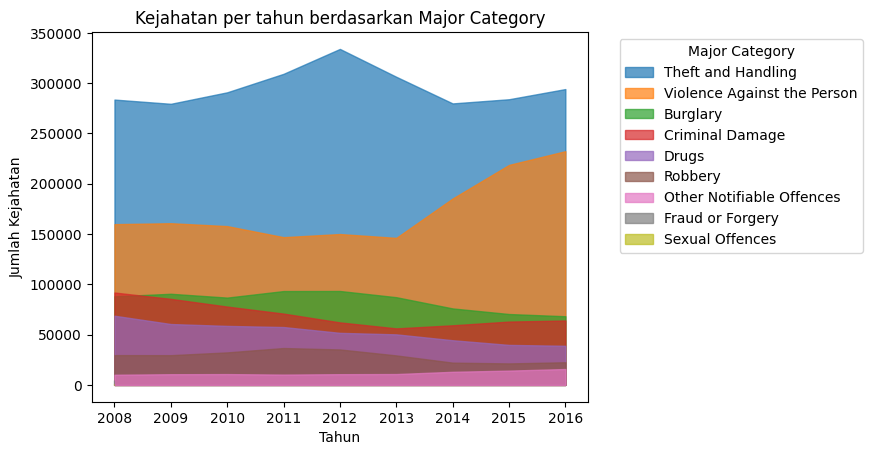

In [18]:
# Merestrukturisasi data
unstacked_data = total_major_category.pivot(index='year', columns='major_category', values='value')

# Mengurutkan legenda berdasarkan total nilai tertinggi
sorted_legend = unstacked_data.sum().sort_values(ascending=False).index

# Membuat plot area tanpa pelapisan dengan warna fill untuk setiap kategori
colors = plt.cm.tab10.colors
for i, category in enumerate(sorted_legend):
    plt.fill_between(unstacked_data.index, unstacked_data[category], color=colors[i], alpha=0.7, label=category)

plt.title('Kejahatan per tahun berdasarkan Major Category')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kejahatan')
plt.legend(title='Major Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**Dari plot diatas dapat disimpulkan bahwa terdapat 2 major kejahatan dengan jumlah diatas 100 rb kasus yaitu Theft and handling dan Violence Against the Person, major kejahatan lainya dibawah 100 rb kasus setiap tahunnya**


### Area plot kejahatan per tahun berdasarkan kota

In [19]:
# Menghitung total value berdasarkan major_category
list_crime_city = new_df[new_df['value'] != 0].groupby('city')['value'].sum()
list_crime_city = list_crime_city.sort_values(ascending=False)

# Menampilkan hasil
list_crime_city

city
Westminster               455028
Lambeth                   292178
Southwark                 278809
Camden                    275147
Newham                    262024
Croydon                   260294
Ealing                    251562
Islington                 230286
Tower Hamlets             228613
Brent                     227551
Hackney                   217119
Lewisham                  215137
Haringey                  213272
Barnet                    212191
Hillingdon                209680
Wandsworth                204741
Waltham Forest            203879
Enfield                   193880
Hounslow                  186772
Hammersmith and Fulham    185259
Bromley                   184349
Redbridge                 183562
Greenwich                 181568
Kensington and Chelsea    171981
Barking and Dagenham      149447
Havering                  138947
Harrow                    116848
Merton                    115654
Bexley                    114136
Sutton                    100987
Richm

In [20]:
# Menghitung total value berdasarkan major_category (tidak menghitung yang bernilai 0)
total_crime_city = new_df[new_df['value'] != 0].groupby(['city', 'year'])['value'].sum().reset_index()

# Menampilkan hasil
print(total_crime_city)

                     city  year  value
0    Barking and Dagenham  2008  17656
1    Barking and Dagenham  2009  17713
2    Barking and Dagenham  2010  17130
3    Barking and Dagenham  2011  16686
4    Barking and Dagenham  2012  15990
..                    ...   ...    ...
289           Westminster  2012  59226
290           Westminster  2013  53852
291           Westminster  2014  47564
292           Westminster  2015  47395
293           Westminster  2016  48330

[294 rows x 3 columns]


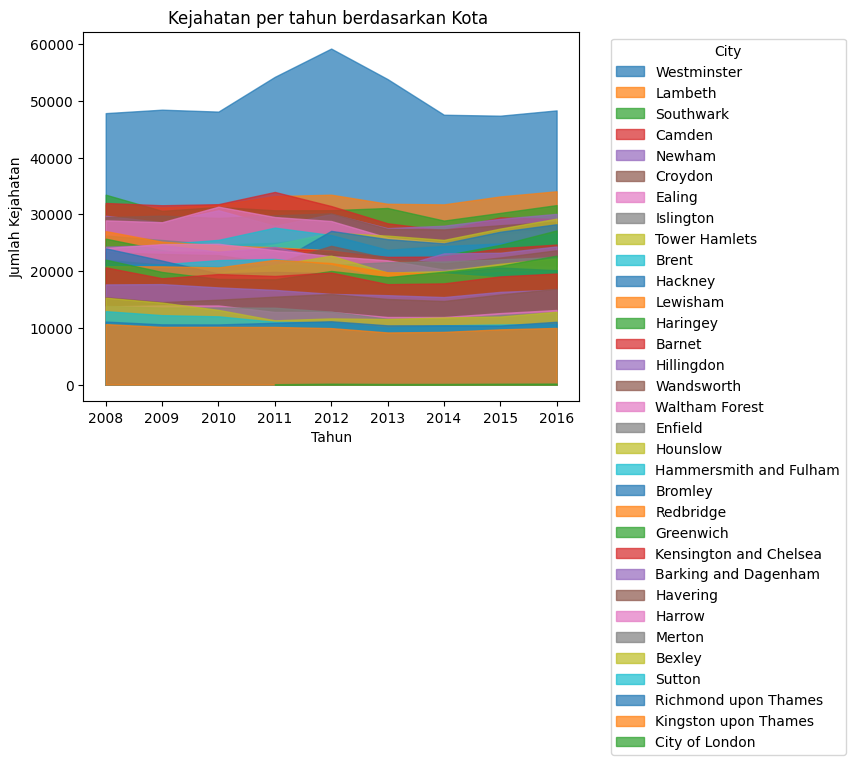

In [21]:
# Merestrukturisasi data
unstacked_data = total_crime_city.pivot(index='year', columns='city', values='value')

# Mengurutkan legenda berdasarkan total nilai tertinggi
sorted_legend = unstacked_data.sum().sort_values(ascending=False).index

# Membuat plot area tanpa pelapisan dengan warna fill untuk setiap kategori
colors = plt.cm.tab10.colors
for i, category in enumerate(sorted_legend):
    plt.fill_between(unstacked_data.index, unstacked_data[category], color=colors[i % len(colors)], alpha=0.7, label=category)

plt.title('Kejahatan per tahun berdasarkan Kota ')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kejahatan')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Dari plot di atas dapat disimpulkan bahwa terdapat 1 kota dengan frekuensi kejahatan dibawah 10000 kasus yaitu City of London, dan kota dengan frekuensi tertinggi adalah kota Westmintser, sedangkan kota-kota lainya berada di frekuensi 10000-40000 kasus kejahatan**

## Histogram

### Histogram Kejahatan 'Theft and Handling' di Westminster (2008-2016)

In [22]:
# Menghitung total value kejahatan berdasarkan major_category 'Theft and Handling' (tanpa menghitung yang bernilai 0) selama 2008-2016
total_crime_city_year = new_df[(new_df['value'] != 0) & (new_df['major_category'] == 'Theft and Handling')].groupby(['city', 'year'])['value'].sum().reset_index()
total_crime_city_year

,city,year,value
0,Barking and Dagenham,2008,5354
1,Barking and Dagenham,2009,5384
2,Barking and Dagenham,2010,5805
3,Barking and Dagenham,2011,6070
4,Barking and Dagenham,2012,6173
...,...,...,...
289,Westminster,2012,38152
290,Westminster,2013,33868
291,Westminster,2014,28144
292,Westminster,2015,27980


In [23]:
westminster_total_crime = total_crime_city_year[total_crime_city_year['city'] == 'Westminster']
print(westminster_total_crime)


            city  year  value
285  Westminster  2008  29266
286  Westminster  2009  29967
287  Westminster  2010  29191
288  Westminster  2011  33529
289  Westminster  2012  38152
290  Westminster  2013  33868
291  Westminster  2014  28144
292  Westminster  2015  27980
293  Westminster  2016  27520


<Figure size 1000x600 with 0 Axes>

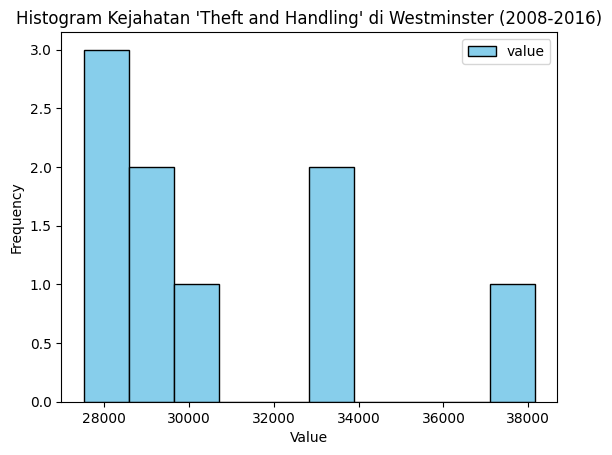

In [24]:
# Membuat histogram menggunakan metode .plot(kind='hist')
plt.figure(figsize=(10, 6))
westminster_total_crime.plot(kind='hist', y='value', x='year', bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram Kejahatan \'Theft and Handling\' di Westminster (2008-2016)')
plt.show()

**Dari histogram diatas dapat dijelaskan bawha selama 9 tahun terakhir kejahatan Theft and Handling di kota Westminster tercatat sekali menembus angka 38000 kasus, dan kasus terendah di 28000 kasus selama 3 kali.**

### Histogram Kejahatan 'Theft and Handling' di Westminster per bulan ditahun 2016

In [25]:
# Menghitung total value kejahatan berdasarkan major_category 'Theft and Handling' (tanpa menghitung yang bernilai 0) selama 2008-2016
total_crime_city_month = new_df[(new_df['value'] != 0) & (new_df['major_category'] == 'Theft and Handling') & (new_df['year'] == 2016)].groupby(['city', 'month'])['value'].sum().reset_index()
total_crime_city_month

,city,month,value
0,Barking and Dagenham,1,423
1,Barking and Dagenham,2,422
2,Barking and Dagenham,3,505
3,Barking and Dagenham,4,487
4,Barking and Dagenham,5,500
...,...,...,...
391,Westminster,8,2297
392,Westminster,9,2011
393,Westminster,10,2313
394,Westminster,11,2559


In [26]:
# Filter khusus kota Westminster
westminster_total_crime_month = total_crime_city_month[total_crime_city_month['city'] == 'Westminster']
print(westminster_total_crime_month)

            city  month  value
384  Westminster      1   2400
385  Westminster      2   2235
386  Westminster      3   2080
387  Westminster      4   2121
388  Westminster      5   2124
389  Westminster      6   2098
390  Westminster      7   2414
391  Westminster      8   2297
392  Westminster      9   2011
393  Westminster     10   2313
394  Westminster     11   2559
395  Westminster     12   2868


<Figure size 1000x600 with 0 Axes>

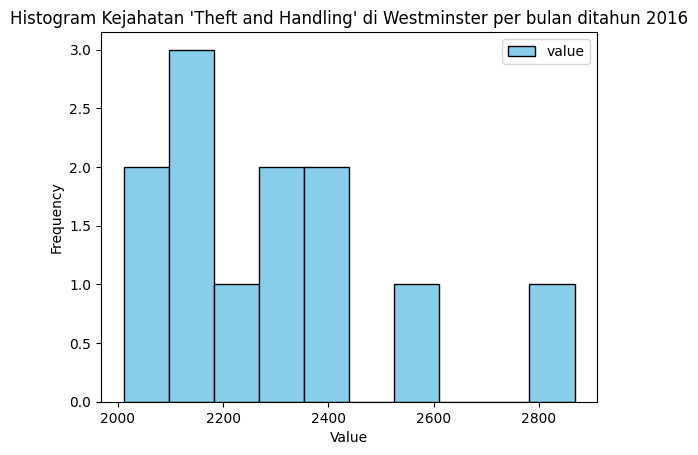

In [27]:
# Membuat histogram menggunakan metode .plot(kind='hist')
plt.figure(figsize=(10, 6))
westminster_total_crime_month.plot(kind='hist', y='value', x='month', bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram Kejahatan \'Theft and Handling\' di Westminster per bulan ditahun 2016')
plt.show()

**Dari histogram diatas dapat dijelaskan bawha selama tahun 2016 kejahatan Theft and Handling di kota Westminster tercatat sekali menembus angka 2800 kasus/bulan.**

## Bar Chart

### Bar chart komparasi kejahata pada kota New Ham dan Croydon pada tahun 2008-2016

In [28]:
compare_total_crime = total_crime_city_year[(total_crime_city_year['city'] == 'Newham') | (total_crime_city_year['city'] == 'Croydon')]
compare_total_crime


,city,year,value
60,Croydon,2008,9604
61,Croydon,2009,10026
62,Croydon,2010,10494
63,Croydon,2011,10727
64,Croydon,2012,11754
65,Croydon,2013,10307
66,Croydon,2014,9794
67,Croydon,2015,9502
68,Croydon,2016,9229
213,Newham,2008,11295


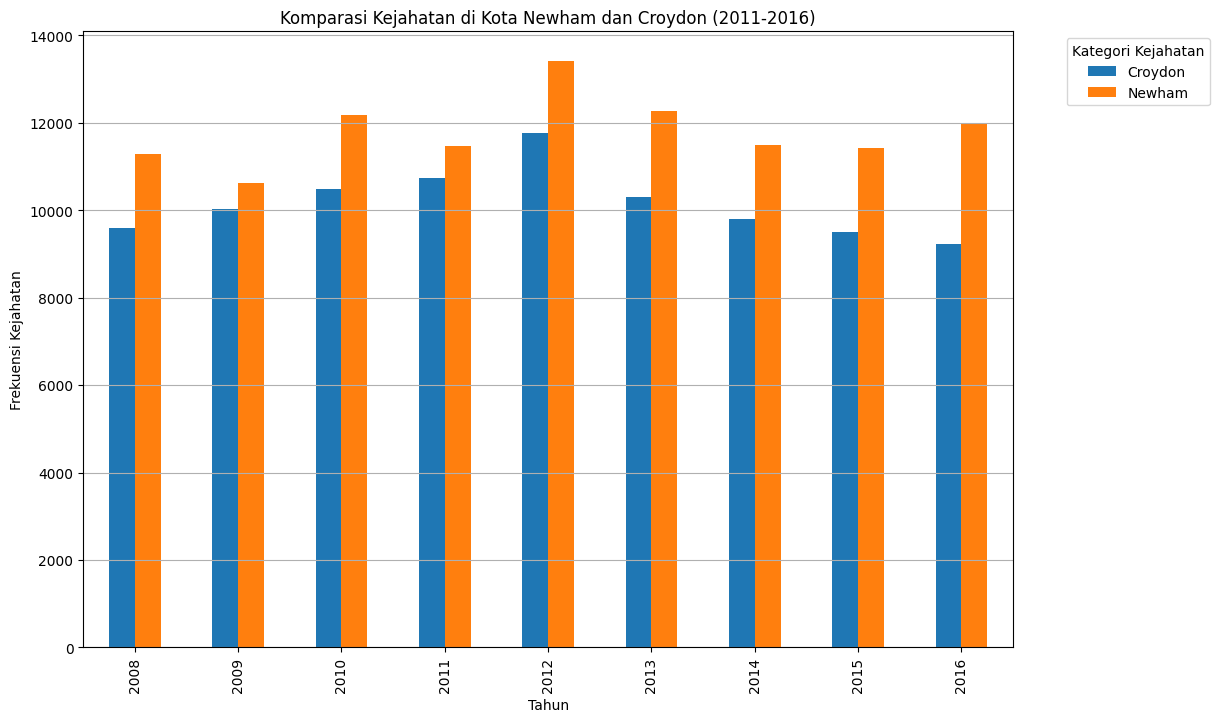

In [29]:
# Buat pivot table untuk mempermudah plotting
pivot_table = compare_total_crime.pivot_table(index='year', columns='city', values='value', aggfunc='sum')

# Buat plot
# Buat plot bar
pivot_table.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.title('Komparasi Kejahatan di Kota Newham dan Croydon (2011-2016)')
plt.xlabel('Tahun')
plt.ylabel('Frekuensi Kejahatan')
plt.legend(title='Kategori Kejahatan', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.show()

**Berdasarkan chart bar diatas, kejahatan di kota Croydon lebih rendah dibandingkan kota New Ham. Dari keduanya kejahatan tertinggi terjadi pada tahun 2012.**

### Frekuensi Kejahatan di City of London (2011-2016)

In [30]:
london_total_crime = new_df[(new_df['value'] != 0) & (new_df['city'] == 'City of London')].groupby(['city', 'major_category', 'year'])['value'].sum().reset_index()
london_total_crime

,city,major_category,year,value
0,City of London,Burglary,2011,1
1,City of London,Burglary,2012,3
2,City of London,Burglary,2013,3
3,City of London,Burglary,2014,1
4,City of London,Burglary,2015,5
5,City of London,Burglary,2016,2
6,City of London,Criminal Damage,2011,2
7,City of London,Criminal Damage,2012,2
8,City of London,Criminal Damage,2013,3
9,City of London,Criminal Damage,2014,4


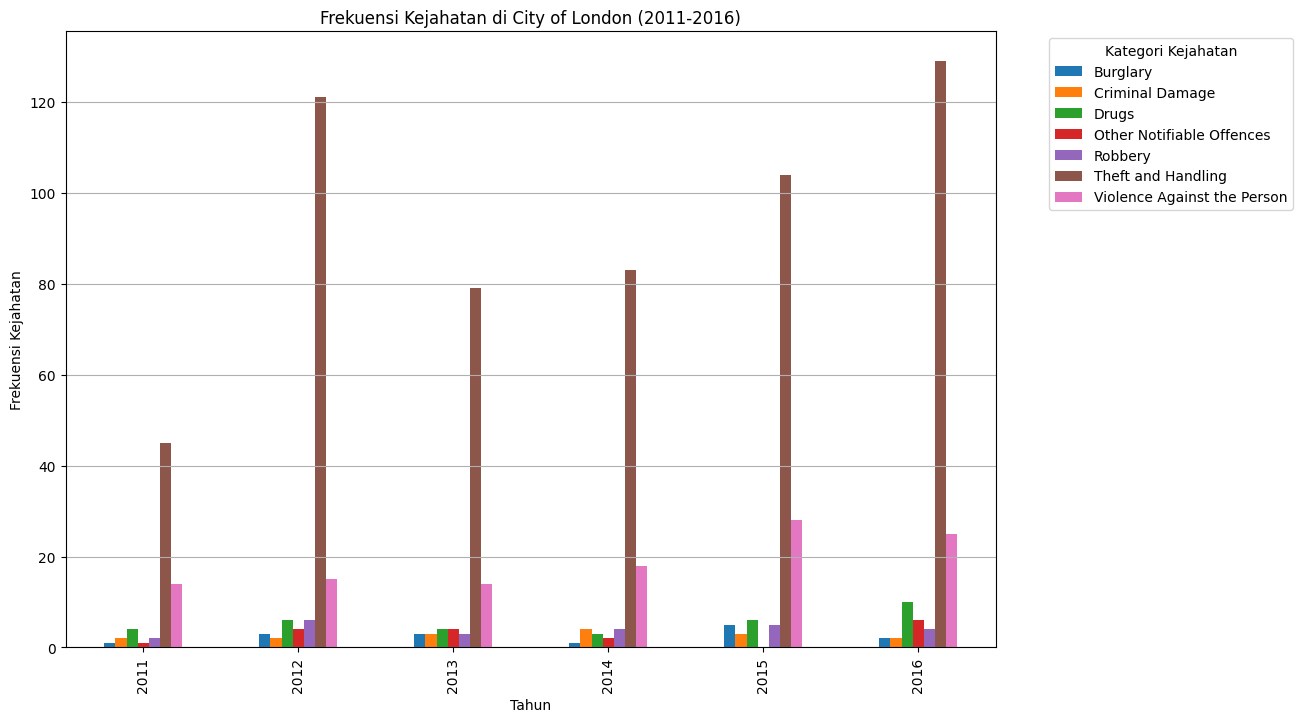

In [31]:
# Buat pivot table untuk mempermudah plotting
pivot_table = london_total_crime.pivot_table(index='year', columns='major_category', values='value', aggfunc='sum')

# Buat plot
# Buat plot bar
pivot_table.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.title('Frekuensi Kejahatan di City of London (2011-2016)')
plt.xlabel('Tahun')
plt.ylabel('Frekuensi Kejahatan')
plt.legend(title='Kategori Kejahatan', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.show()

**Berdasarkan Chart Bar diatas, diketahui data kejahatan di City of London dimulai dari tahun 2011-2016. Terdapat 2 Kejahatan dengan frekuensi yang tinggi yaitu Theft and Handling dan Violence Against the Person.**

## Pie Chart

### Pie chart Persentase Frekuensi Kejahatan di City of London (2016)

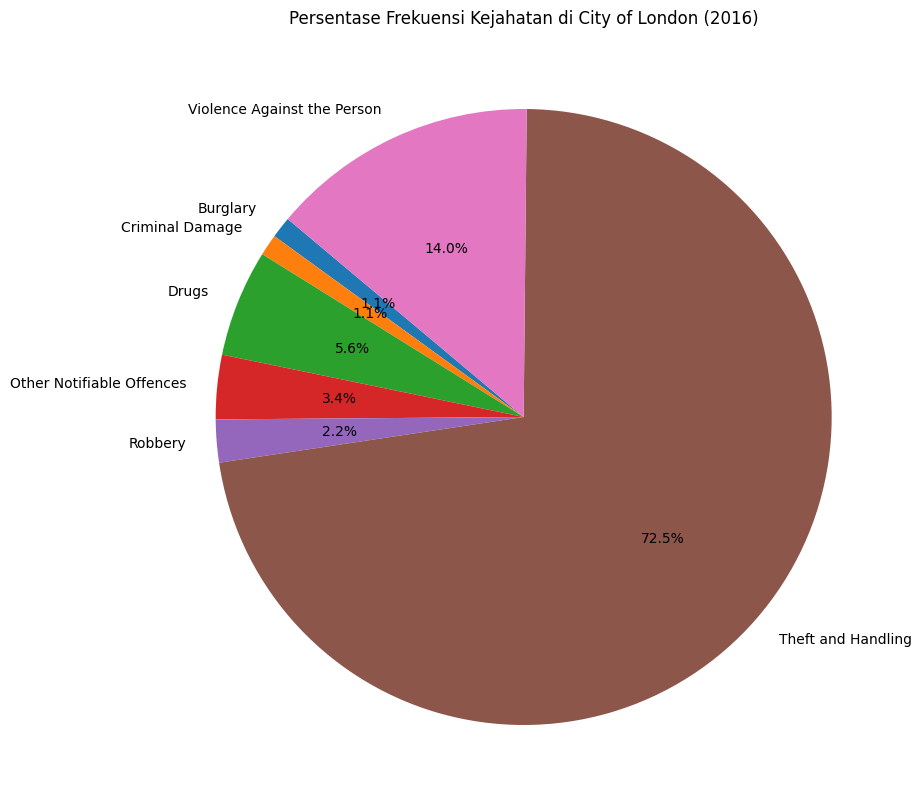

In [32]:
# Filter data untuk tahun 2016
data_2016 = london_total_crime[london_total_crime['year'] == 2016]

# Buat pivot table untuk mempermudah plotting
pivot_table_2016 = data_2016.pivot_table(index='year', columns='major_category', values='value', aggfunc='sum')

# Ambil total frekuensi kejahatan untuk tahun 2016
total_crime_2016 = pivot_table_2016.sum()

# Buat pie chart
plt.figure(figsize=(10, 10))
plt.pie(total_crime_2016, labels=total_crime_2016.index, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Frekuensi Kejahatan di City of London (2016)')
plt.show()

**Berdasarkan pie chart diatas, Theft and Handling adalah kejahatan dengan frekuensi terbesar di City of London dengan presentase 72.5% dan disusul oleh Violence Against the Person dengan frekuensi 14%.**

### Pie chart Persentase Frekuensi Minor Kejahatan dari Theft and Handling di City of London (2016)

In [33]:
minor_TaH_london_2016 = new_df[(new_df['value'] != 0) & (new_df['city'] == 'City of London') & (new_df['major_category'] == 'Theft and Handling')].groupby(['city', 'major_category', 'minor_category', 'year'])['value'].sum().reset_index()

minor_TaH_london_2016

,city,major_category,minor_category,year,value
0,City of London,Theft and Handling,Handling Stolen Goods,2012,2
1,City of London,Theft and Handling,Handling Stolen Goods,2013,1
2,City of London,Theft and Handling,Handling Stolen Goods,2014,1
3,City of London,Theft and Handling,Handling Stolen Goods,2015,1
4,City of London,Theft and Handling,Other Theft,2011,26
5,City of London,Theft and Handling,Other Theft,2012,68
6,City of London,Theft and Handling,Other Theft,2013,34
7,City of London,Theft and Handling,Other Theft,2014,40
8,City of London,Theft and Handling,Other Theft,2015,43
9,City of London,Theft and Handling,Other Theft,2016,59


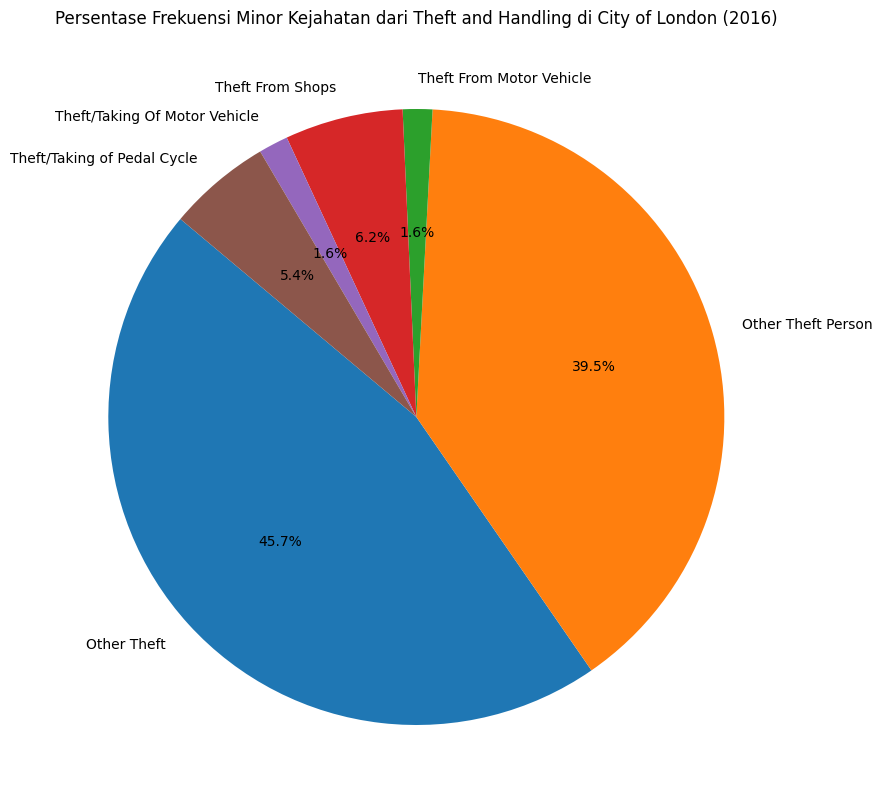

In [34]:
# Filter data untuk tahun 2016
data_2016 = minor_TaH_london_2016[minor_TaH_london_2016['year'] == 2016]

# Buat pivot table untuk mempermudah plotting
pivot_table_2016 = data_2016.pivot_table(index='year', columns='minor_category', values='value', aggfunc='sum')

# Ambil total frekuensi kejahatan untuk tahun 2016
total_crime_2016 = pivot_table_2016.sum()

# Buat pie chart
plt.figure(figsize=(10, 10))
plt.pie(total_crime_2016, labels=total_crime_2016.index, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Frekuensi Minor Kejahatan dari Theft and Handling di City of London (2016)')
plt.show()

**Berdasarkan pie chart diatas, diketahui minor kejahatan yang mendominasi pada kejahatan Theft and Handling di City of London pada tahun 2016, kejahatan tersebut adalah Other Theft dengan presentase 45.7% dan Other Theft Person 39.5%.**

## Box Plot

### Box Plot 'Theft and Handling' di kota London (2016)

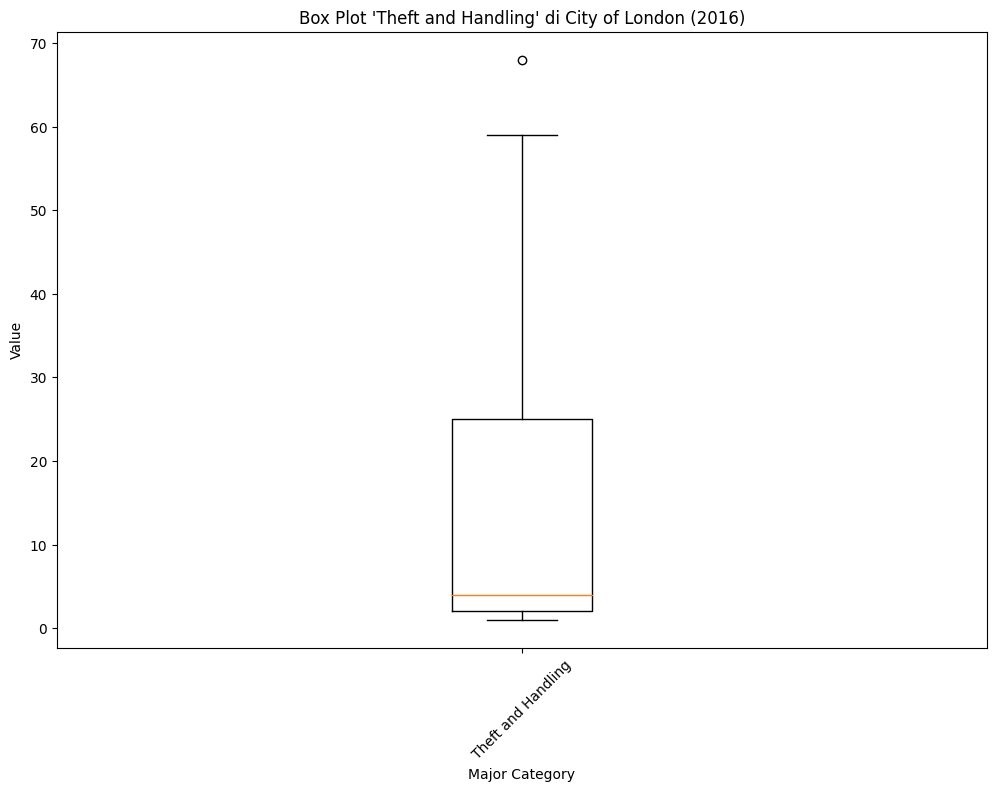

In [48]:
# Misalnya, jika Anda ingin membuat box plot untuk kolom 'value' berdasarkan 'major_category'
plt.figure(figsize=(12, 8))
plt.xticks(rotation=45)
plt.title('Box Plot \'Theft and Handling\' di City of London (2016)')
plt.xlabel('Major Category')
plt.ylabel('Value')
plt.boxplot([minor_TaH_london_2016[minor_TaH_london_2016['major_category'] == category]['value'] for category in minor_TaH_london_2016['major_category'].unique()],
            labels=minor_TaH_london_2016['major_category'].unique())
plt.show()

**Berdasarkan Box plot, kejahatan Theft and Handling di City of London pada tahun 2016, rata-rata terjadi kurang dari 10 disetiap bulanya, walaupun pernah mencapai angka terbesar hampir 70 kejadian dalam sebulan ditahun 2016.**

## Scatter Plot

### Scatter Plot Kejahatan di Kota London (2008-2016

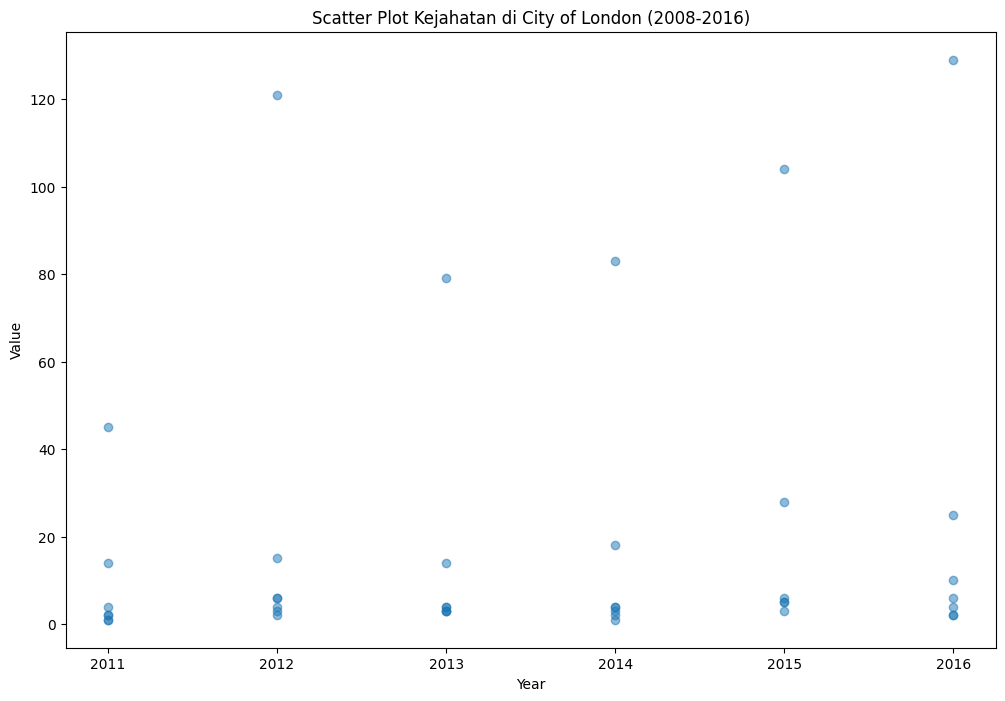

In [47]:
# Filter baris dengan nilai 'value' lebih besar dari 0
filtered_data = london_total_crime[london_total_crime['value'] > 0]

# Memvisualisasikan hubungan antara tahun dan nilai
plt.figure(figsize=(12, 8))
plt.scatter(filtered_data['year'], filtered_data['value'], alpha=0.5)
plt.title('Scatter Plot Kejahatan di City of London (2008-2016)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()

**Berdasarkan scatter plot diatas, persebaran kejahatan di City of london mayoritas kurang dari 10 setiap tahunnya.**

# Kesimpulan

Berdasarkan analisis diatas dengan bantuan matplotlib, beberapa kesimpulan dapat diambil:

Major Kejahatan:
Dua kategori kejahatan utama dengan jumlah kasus di atas 100 ribu setiap tahunnya adalah "Theft and Handling" dan "Violence Against the Person." Kedua kategori ini mendominasi kejahatan di kota tersebut.

Frekuensi Kejahatan per Kota:
City of London adalah satu-satunya kota yang memiliki frekuensi kejahatan di bawah 10 ribu kasus. Sementara itu, Westminster adalah kota dengan frekuensi tertinggi, sementara kota-kota lainnya berada dalam kisaran 10 ribu hingga 40 ribu kasus kejahatan.

Histogram Kejahatan Theft and Handling di Westminster:
Terdapat fluktuasi signifikan dalam jumlah kejahatan "Theft and Handling" di Westminster selama 9 tahun terakhir. Angka tertinggi mencapai 38 ribu kasus, sedangkan terendah mencapai 28 ribu kasus selama 3 tahun.

Histogram Kejahatan Theft and Handling di Westminster (2016):
Pada tahun 2016, kejahatan "Theft and Handling" di Westminster mencapai puncaknya sekitar 2800 kasus per bulan.

Perbandingan Kejahatan antara Croydon dan New Ham:
Croydon memiliki tingkat kejahatan yang lebih rendah dibandingkan dengan New Ham. Keduanya mencatatkan tingkat kejahatan tertinggi pada tahun 2012.

Data Kejahatan di City of London (2011-2016):
City of London memiliki data kejahatan mulai dari tahun 2011 hingga 2016. Dua kejahatan dengan frekuensi tinggi adalah "Theft and Handling" dan "Violence Against the Person."

Pie Chart Kejahatan di City of London:
"Theft and Handling" adalah kejahatan dengan frekuensi terbesar di City of London, menyumbang sekitar 72.5%, diikuti oleh "Violence Against the Person" dengan frekuensi 14%.

Pie Chart Minor Kejahatan di Theft and Handling (2016):
Pada tahun 2016, jenis kejahatan minor yang mendominasi dalam "Theft and Handling" di City of London adalah "Other Theft" dengan presentase 45.7%, diikuti oleh "Other Theft Person" dengan presentase 39.5%.

Box Plot Theft and Handling di City of London (2016):
Dari box plot, dapat disimpulkan bahwa rata-rata kejahatan "Theft and Handling" di City of London pada tahun 2016 adalah kurang dari 10 kasus per bulan, meskipun terdapat nilai ekstrim hingga hampir 70 kejadian dalam sebulan.

Scatter Plot Persebaran Kejahatan di City of London:
Scatter plot menunjukkan bahwa mayoritas kejahatan di City of London setiap tahunnya berada di bawah 10, menunjukkan kecenderungan frekuensi kejahatan yang relatif rendah.